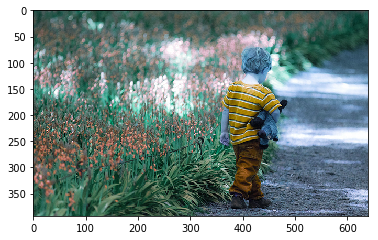

In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
f = "test/assets/boy_beer.jpg"
image = cv2.imread(f)
plt.imshow(image)

In [23]:
def crop_to_human(array, bbox, size = (200,250)):
    x, w, y, h = bbox
    src_points = np.float32([[x-w,y-h],[x-w,y+h],[x+w,y+h]])
    dst_points = np.float32([[0,0],[0,size[1]],[size[0],size[1]]])
    print(src_points)
    print(dst_points)
    trans = cv2.getAffineTransform(src_points,dst_points)
    input = cv2.warpAffine(
        array, trans, (int(size[0]), int(size[1])), flags=cv2.INTER_LINEAR
    )
    return input

[[350.  70.]
 [350. 370.]
 [470. 370.]]
[[  0.   0.]
 [  0. 250.]
 [200. 250.]]


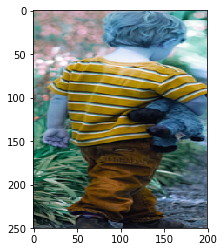

In [40]:

def test_crop_human(im):
    bbox_results = [np.array([410, 60, 220, 150]), np.array([15]), np.array([0.95])]
    size = (200,250)
    im= crop_to_human(im, bbox_results[0], size )
    assert list(im.shape)== [*size[::-1],3 ]
    return im

im = test_crop_human(image)
plt.imshow(im)